In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/mushroom.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,bulbous,silky,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,rhizomorphs,fibrous,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,missing,smooth,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,rooted,scaly,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)       

In [6]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,bulbous,silky,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,rhizomorphs,fibrous,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,missing,smooth,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,rooted,scaly,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [7]:
df.shape

(2000, 25)

In [8]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698606
max,15.095066,25.000054


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

### Missing values

In [10]:
df.isna().sum()           # Their are some values named 'none' which are not counted as null values.

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [11]:
df.replace('none',np.nan,inplace=True)

In [12]:
df.isna().sum()

cap_shape                     0
cap_surface                   0
cap_color                     0
bruises                       0
odor                        179
gill_attachment               0
gill_spacing                  0
gill_size                     0
gill_color                    0
stalk_shape                   0
stalk_root                    0
stalk_surface_above_ring      0
stalk_surface_below_ring      0
stalk_color_above_ring        0
stalk_color_below_ring        0
veil_type                     0
veil_color                    0
ring_number                 665
ring_type                   243
spore_print_color             0
population                    0
habitat                       0
class                         0
stalk_height                  0
cap_diameter                  0
dtype: int64

In [13]:
df['odor'].mode()

0    foul
Name: odor, dtype: object

In [14]:
df['odor'].fillna(df['odor'].mode()[0],inplace=True)

In [15]:
df['odor'].value_counts()

foul        453
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
Name: odor, dtype: int64

In [16]:
df['ring_number'].fillna(df['ring_number'].mode()[0],inplace=True)

In [17]:
df['ring_number'].value_counts()

one    1354
two     646
Name: ring_number, dtype: int64

In [18]:
df['ring_type'].fillna(df['ring_type'].mode()[0],inplace=True)

In [19]:
df['ring_type'].value_counts()

sheathing     548
cobwebby      248
large         247
flaring       246
pendant       239
zone          237
evanescent    235
Name: ring_type, dtype: int64

In [20]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [21]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698606
max,15.095066,25.000054


### Data Visualization

<Axes: xlabel='stalk_height', ylabel='Density'>

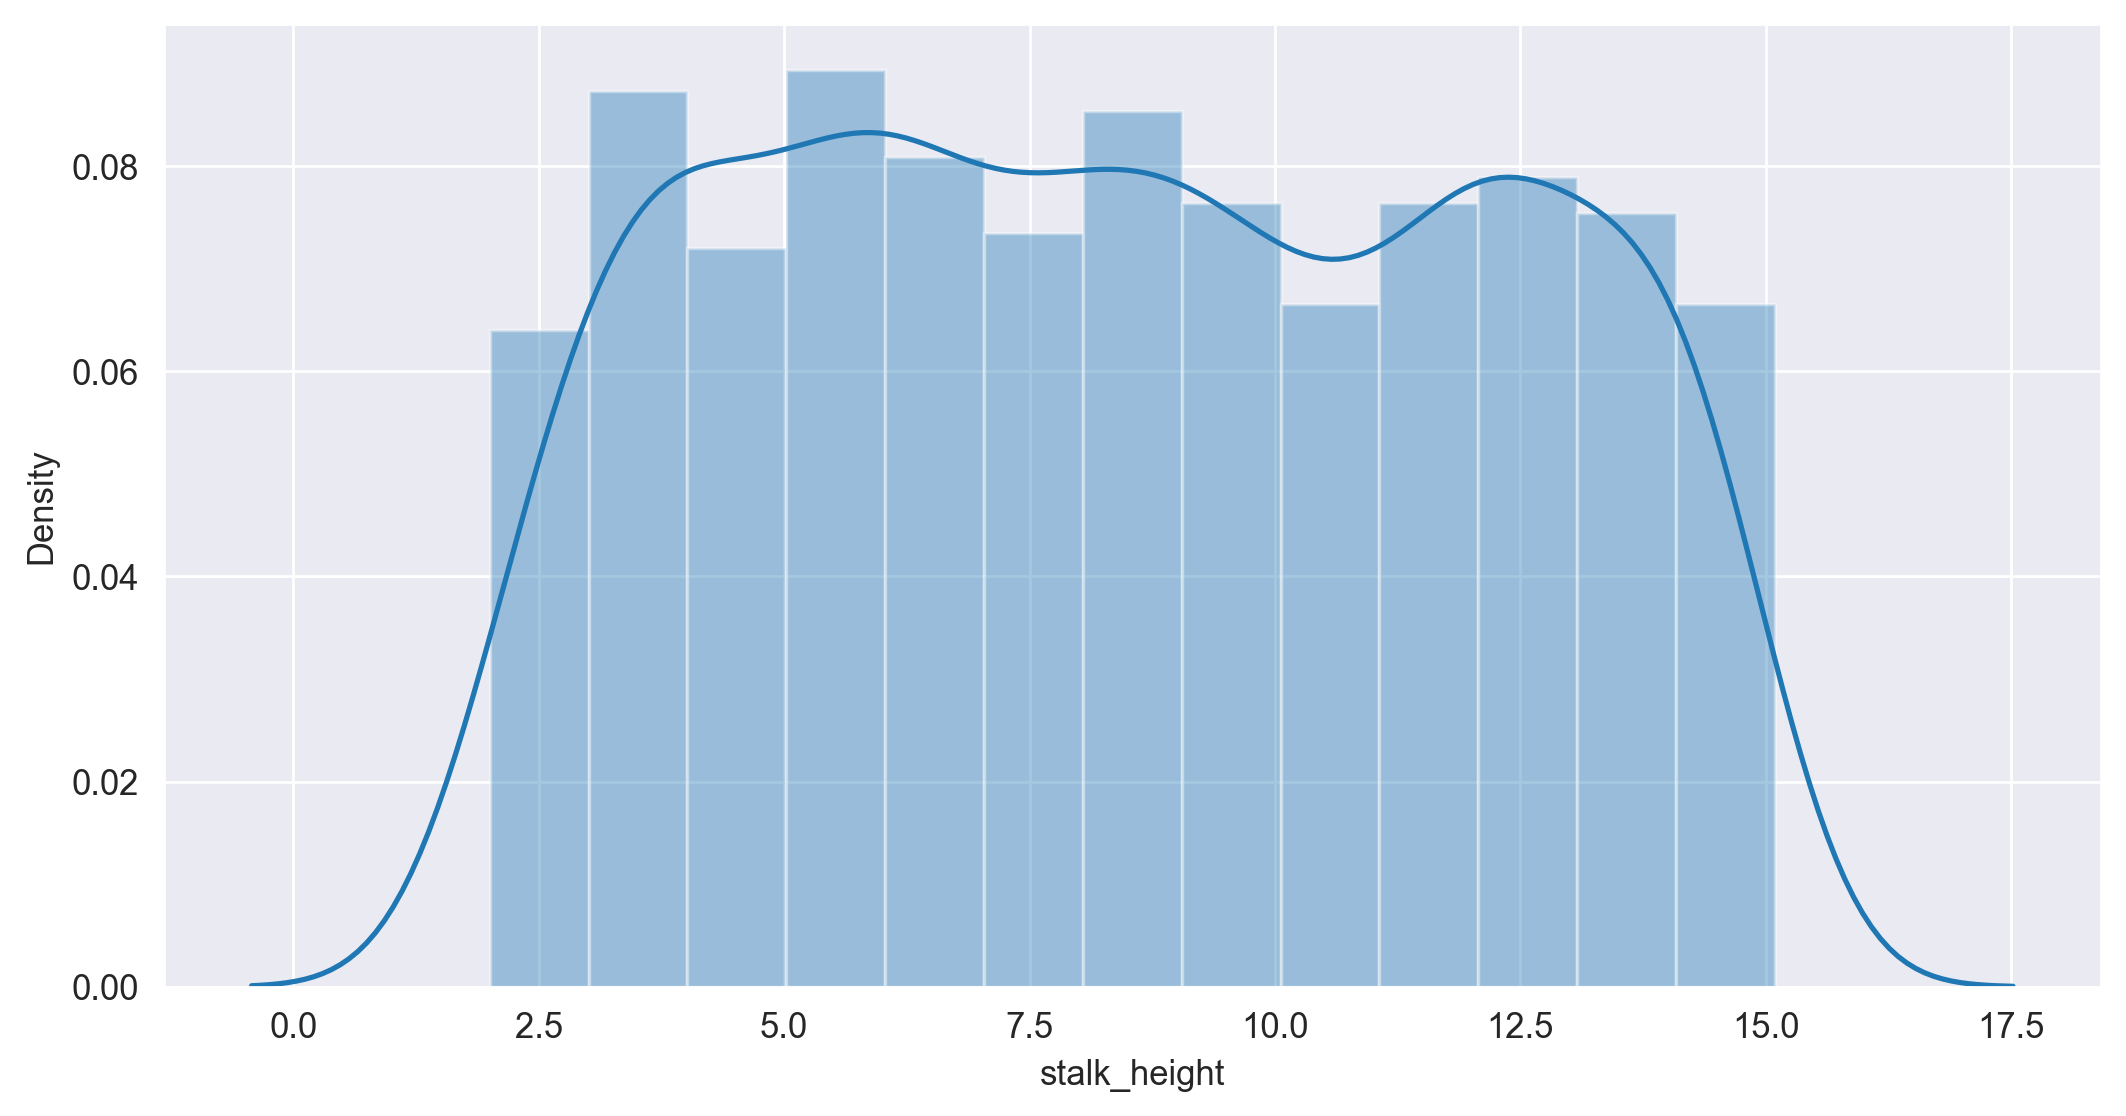

In [22]:
sns.distplot(df['stalk_height'])

<Axes: xlabel='cap_diameter', ylabel='Density'>

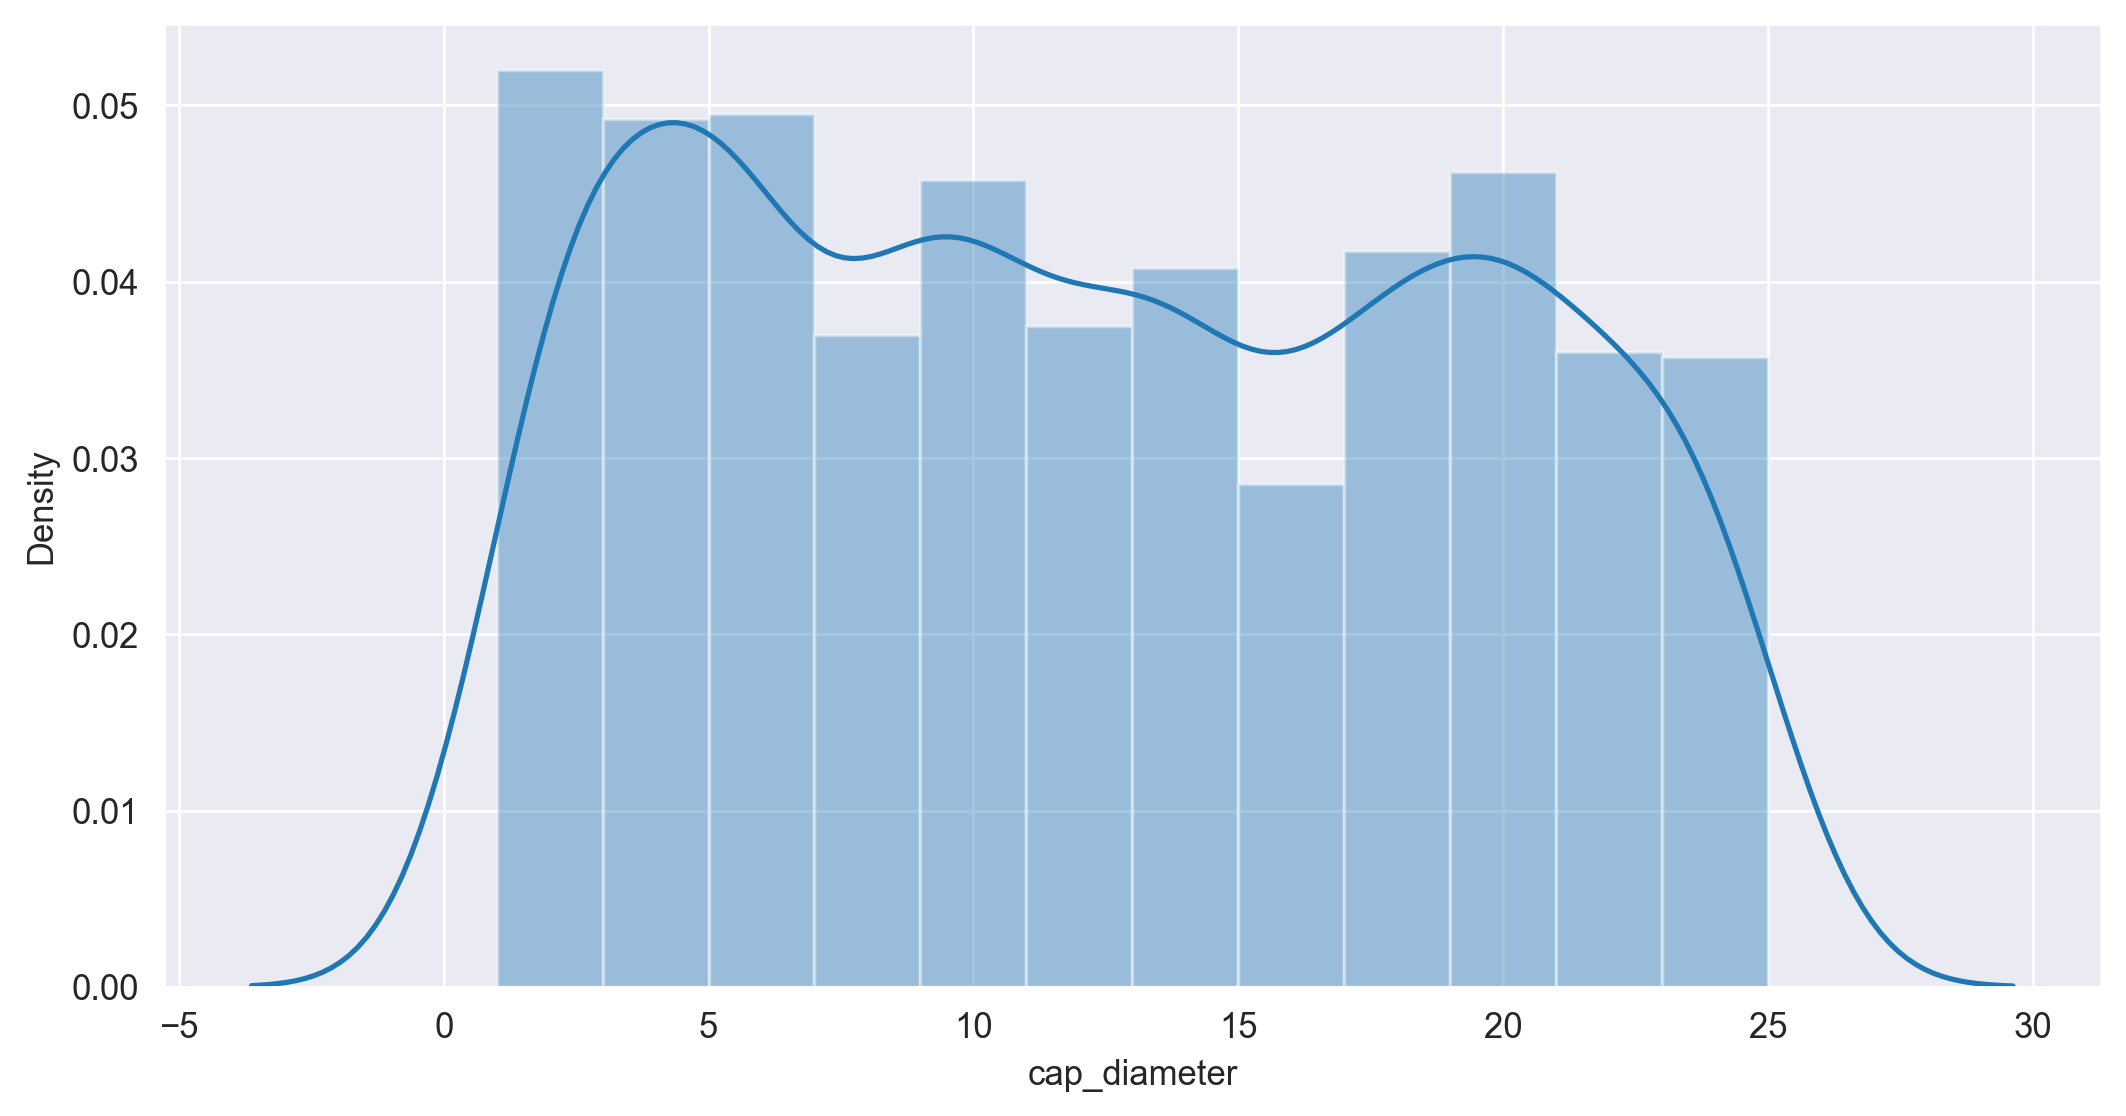

In [23]:
sns.distplot(df['cap_diameter'])

<Axes: ylabel='class'>

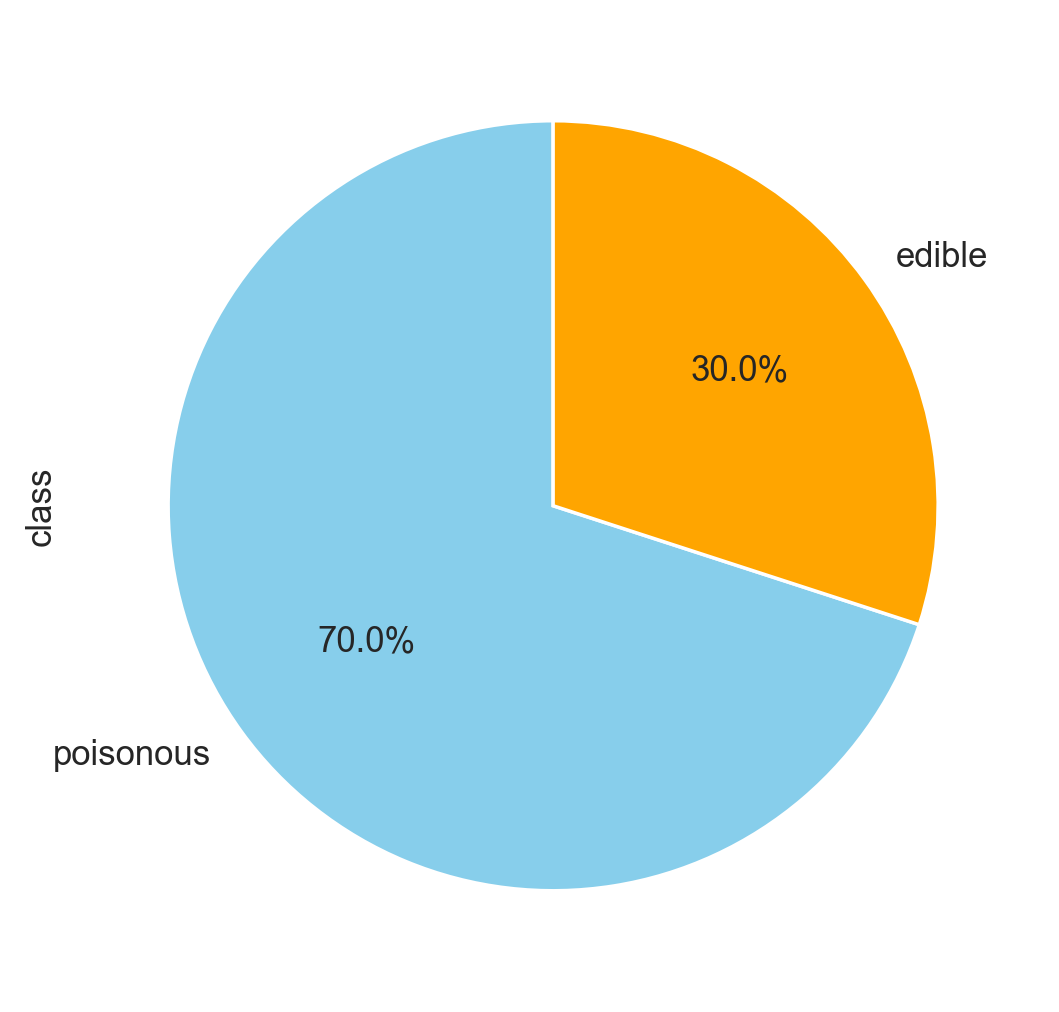

In [24]:
df['class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])

<Axes: xlabel='cap_shape', ylabel='count'>

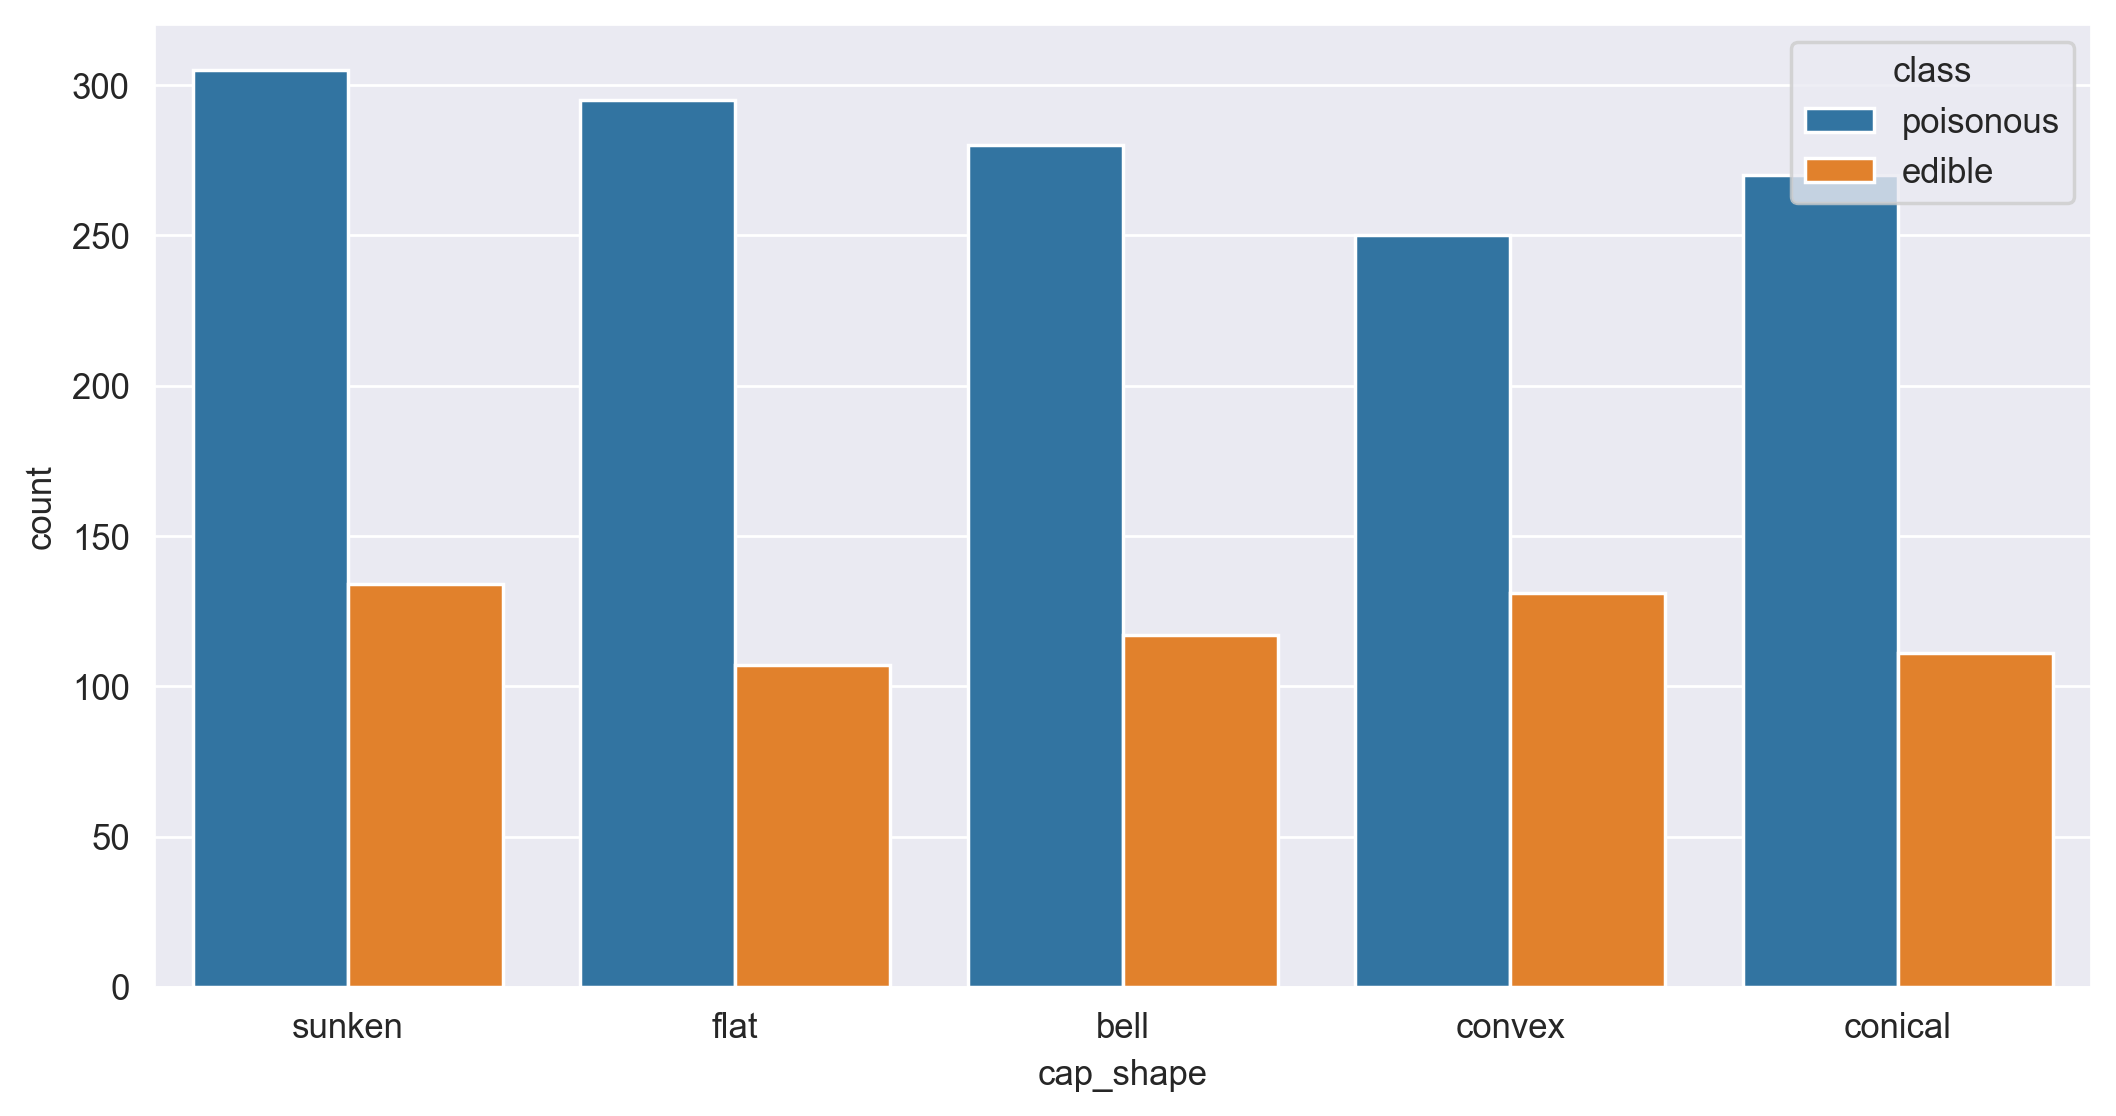

In [25]:
sns.countplot(x = df['cap_shape'],hue=df['class'])

<Axes: xlabel='cap_color', ylabel='count'>

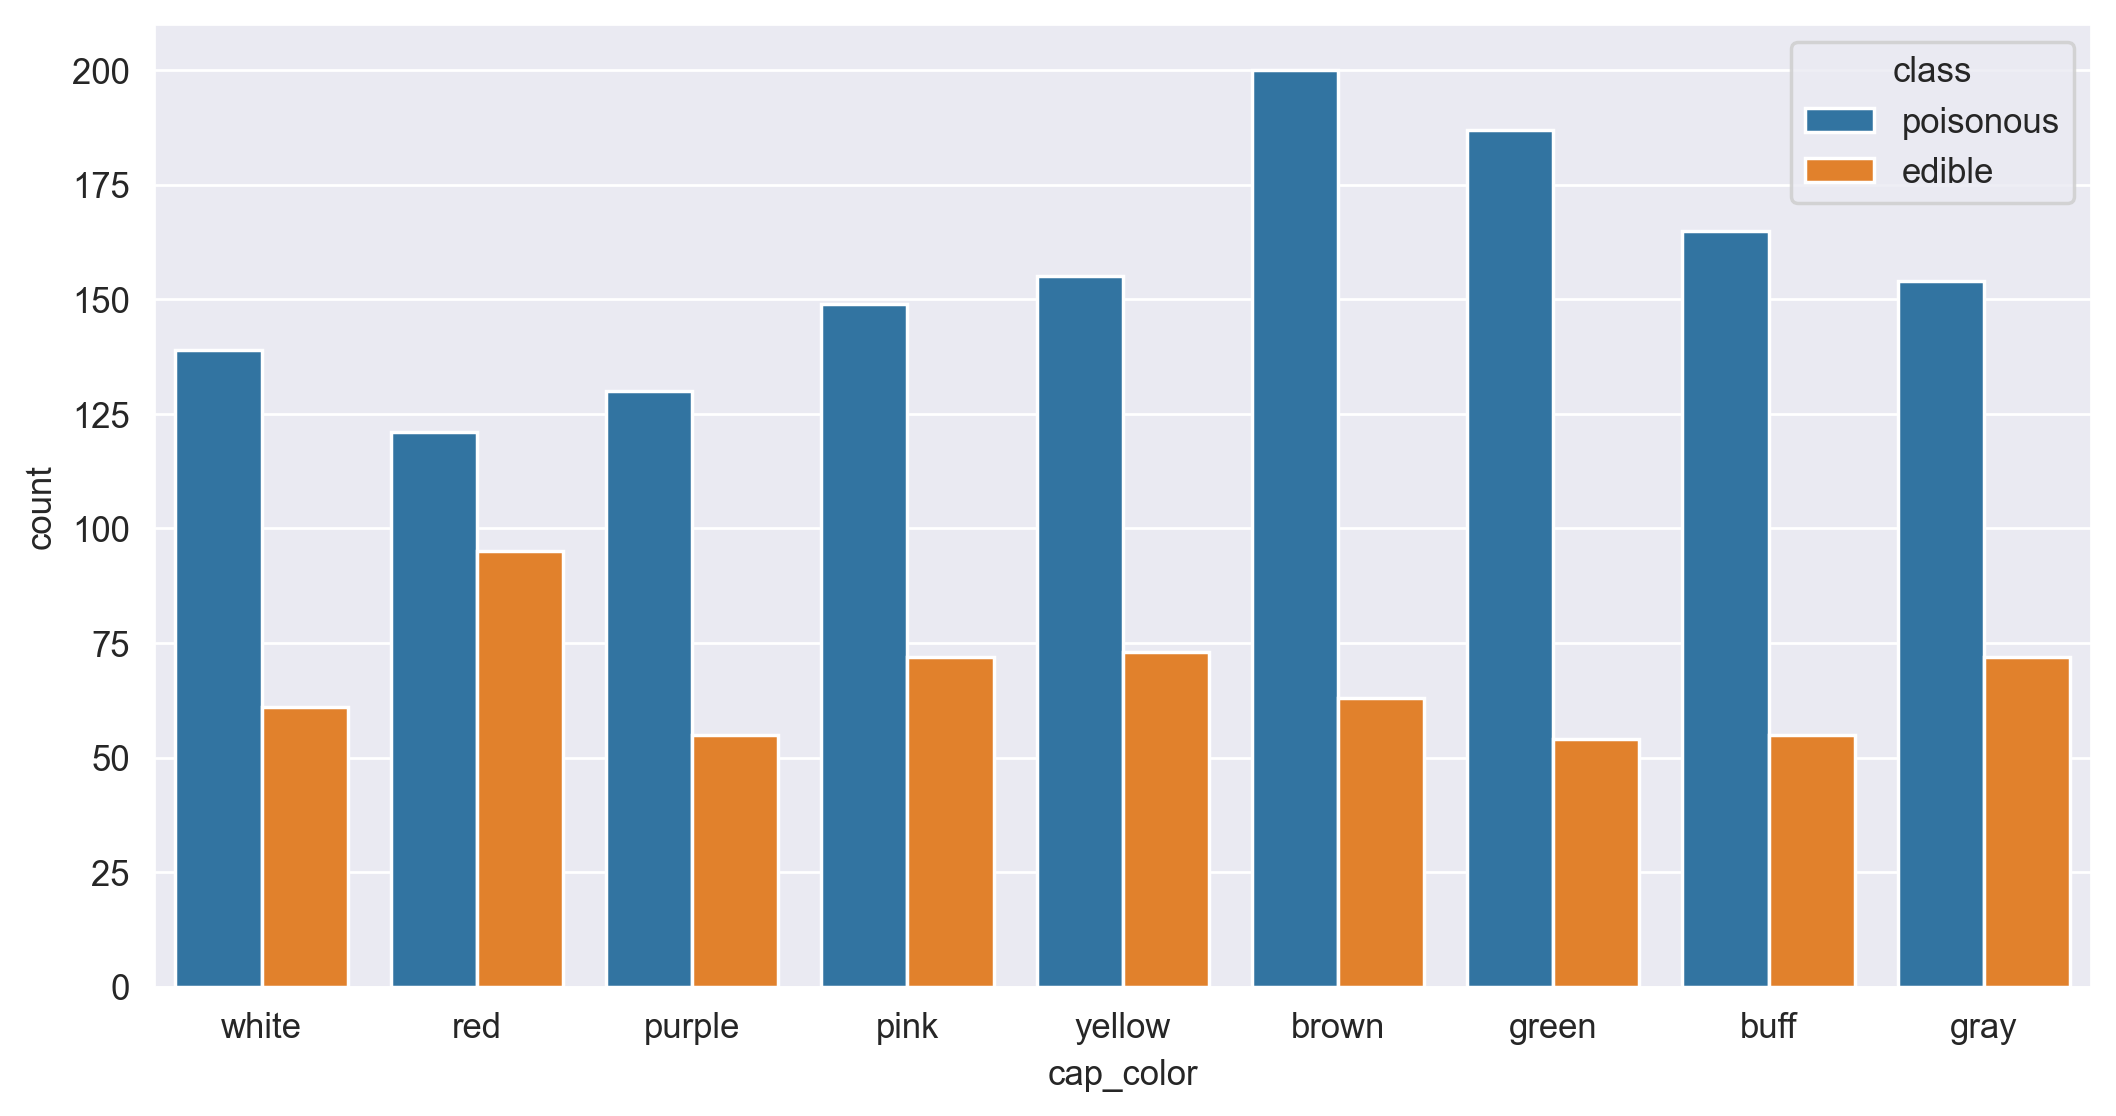

In [26]:
sns.countplot(x = df['cap_color'],hue=df['class'])

<Axes: xlabel='cap_color', ylabel='count'>

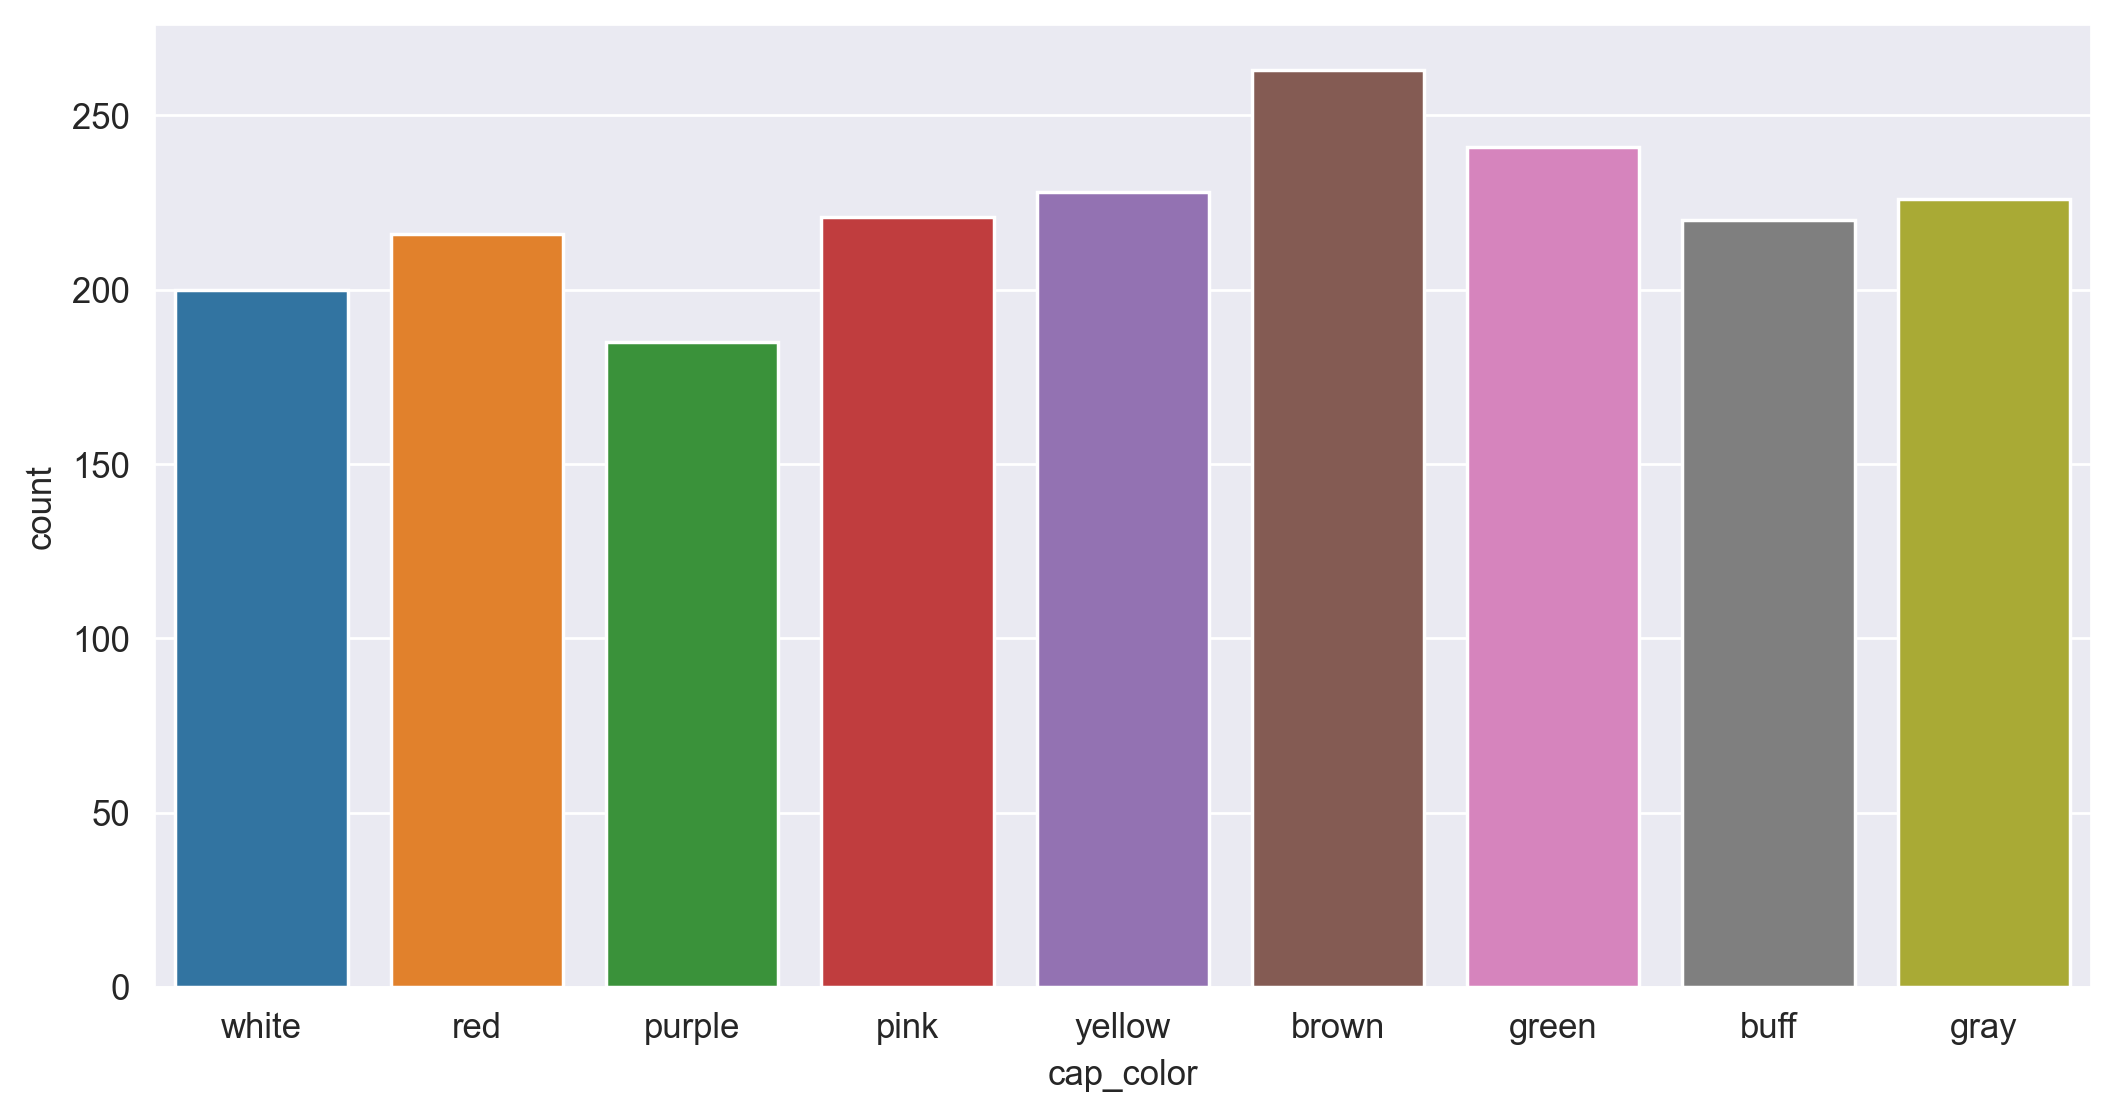

In [27]:
sns.countplot(x = df['cap_color'])

<Axes: xlabel='cap_surface', ylabel='count'>

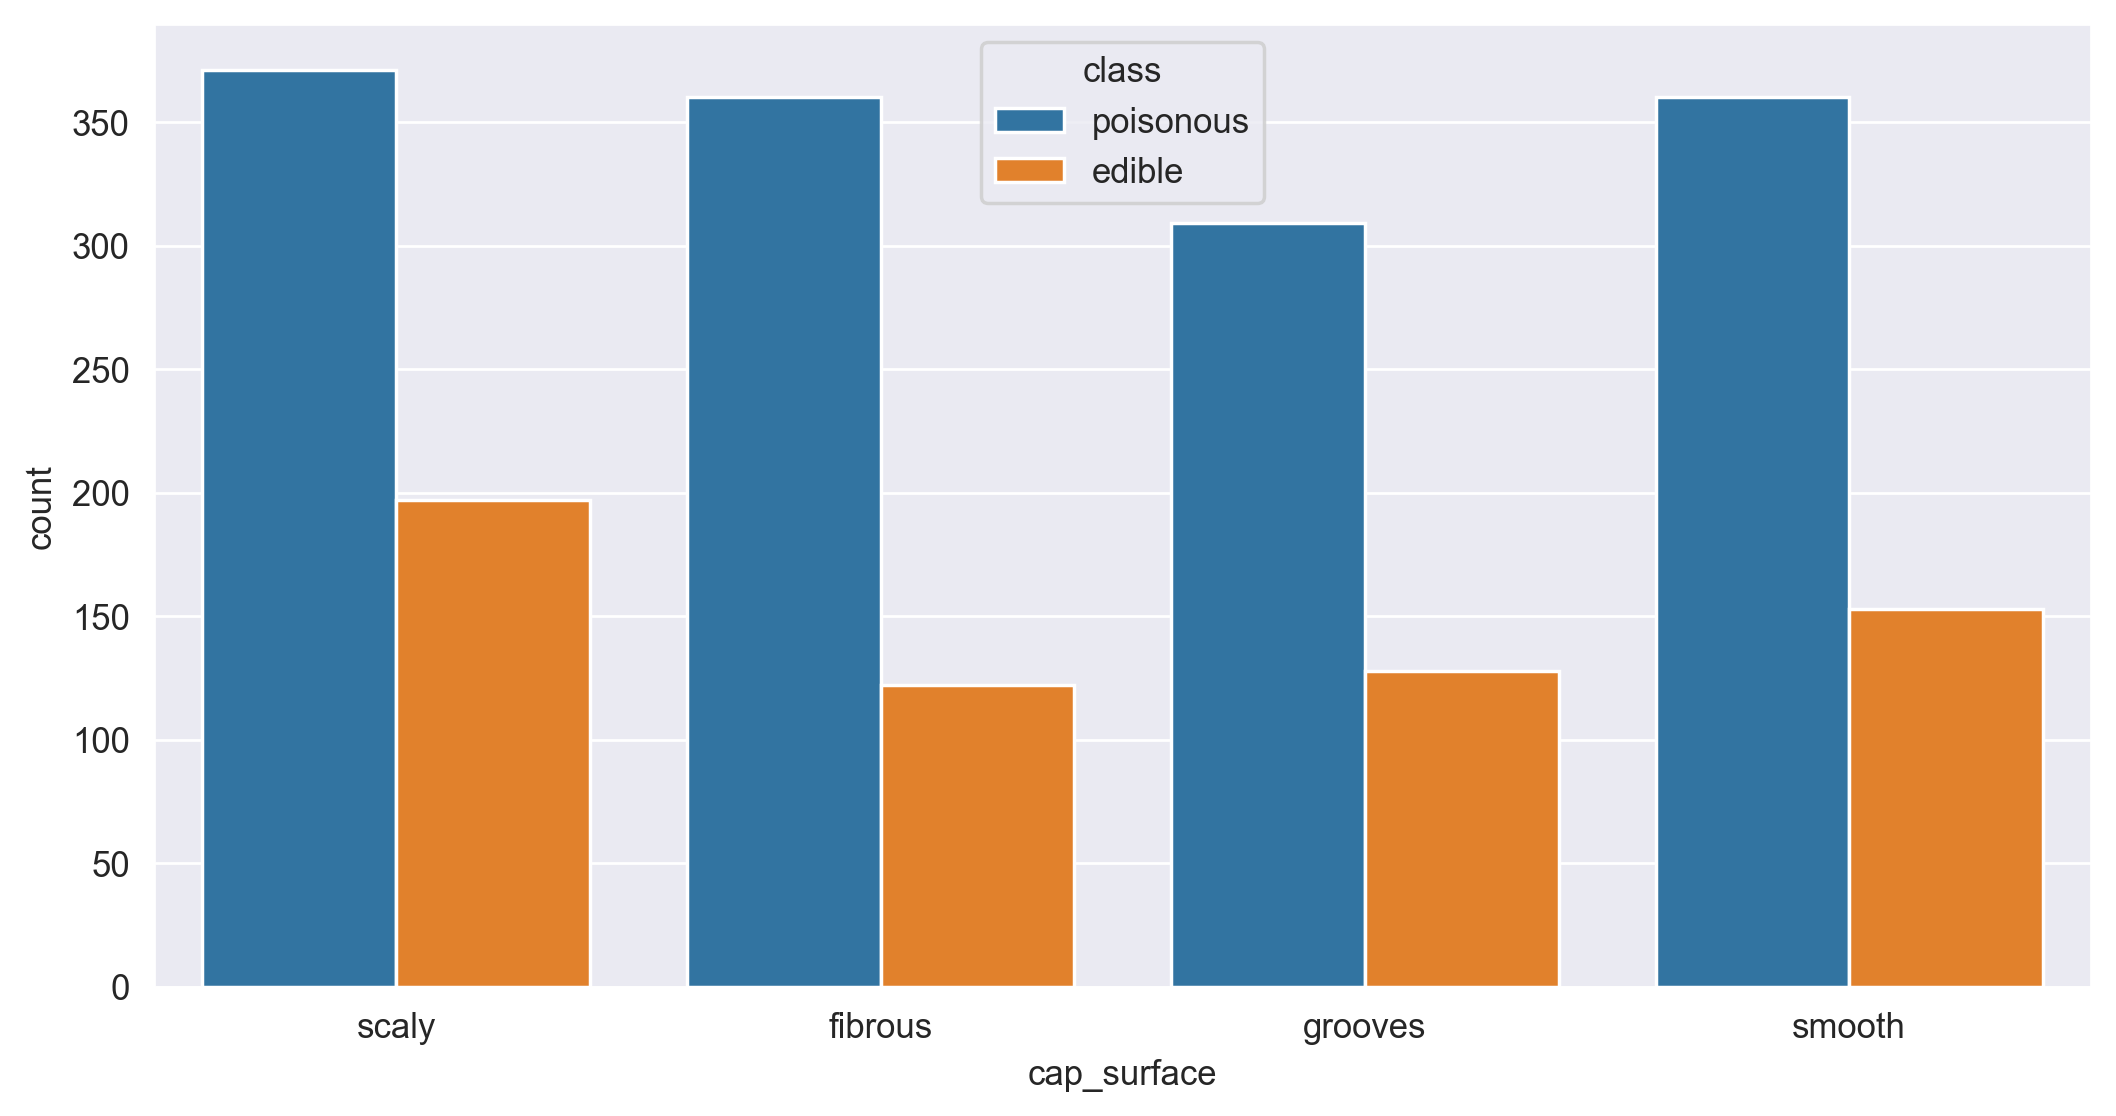

In [28]:
sns.countplot(x = df['cap_surface'],hue=df['class'])

<Axes: xlabel='odor', ylabel='count'>

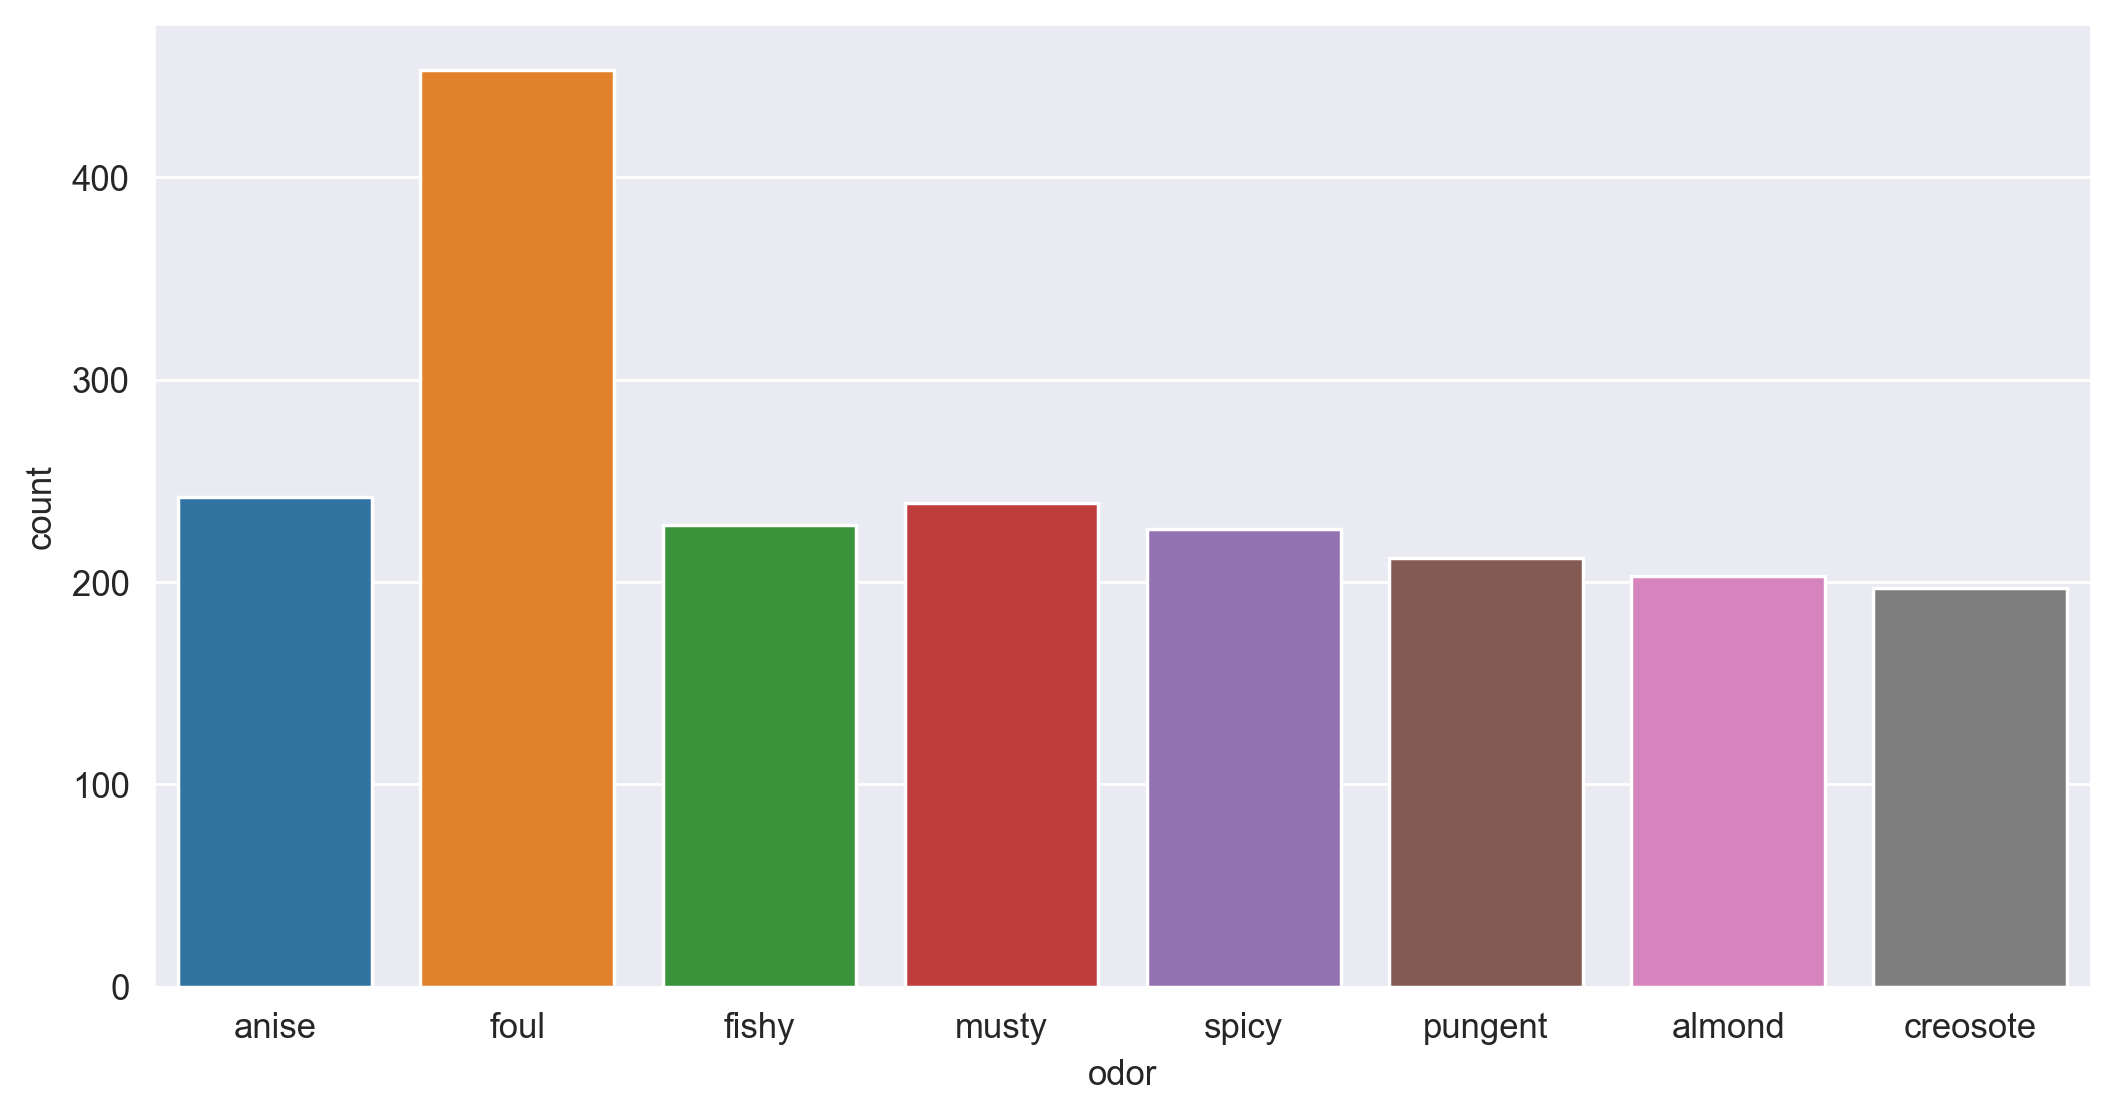

In [29]:
sns.countplot(x= df['odor'])

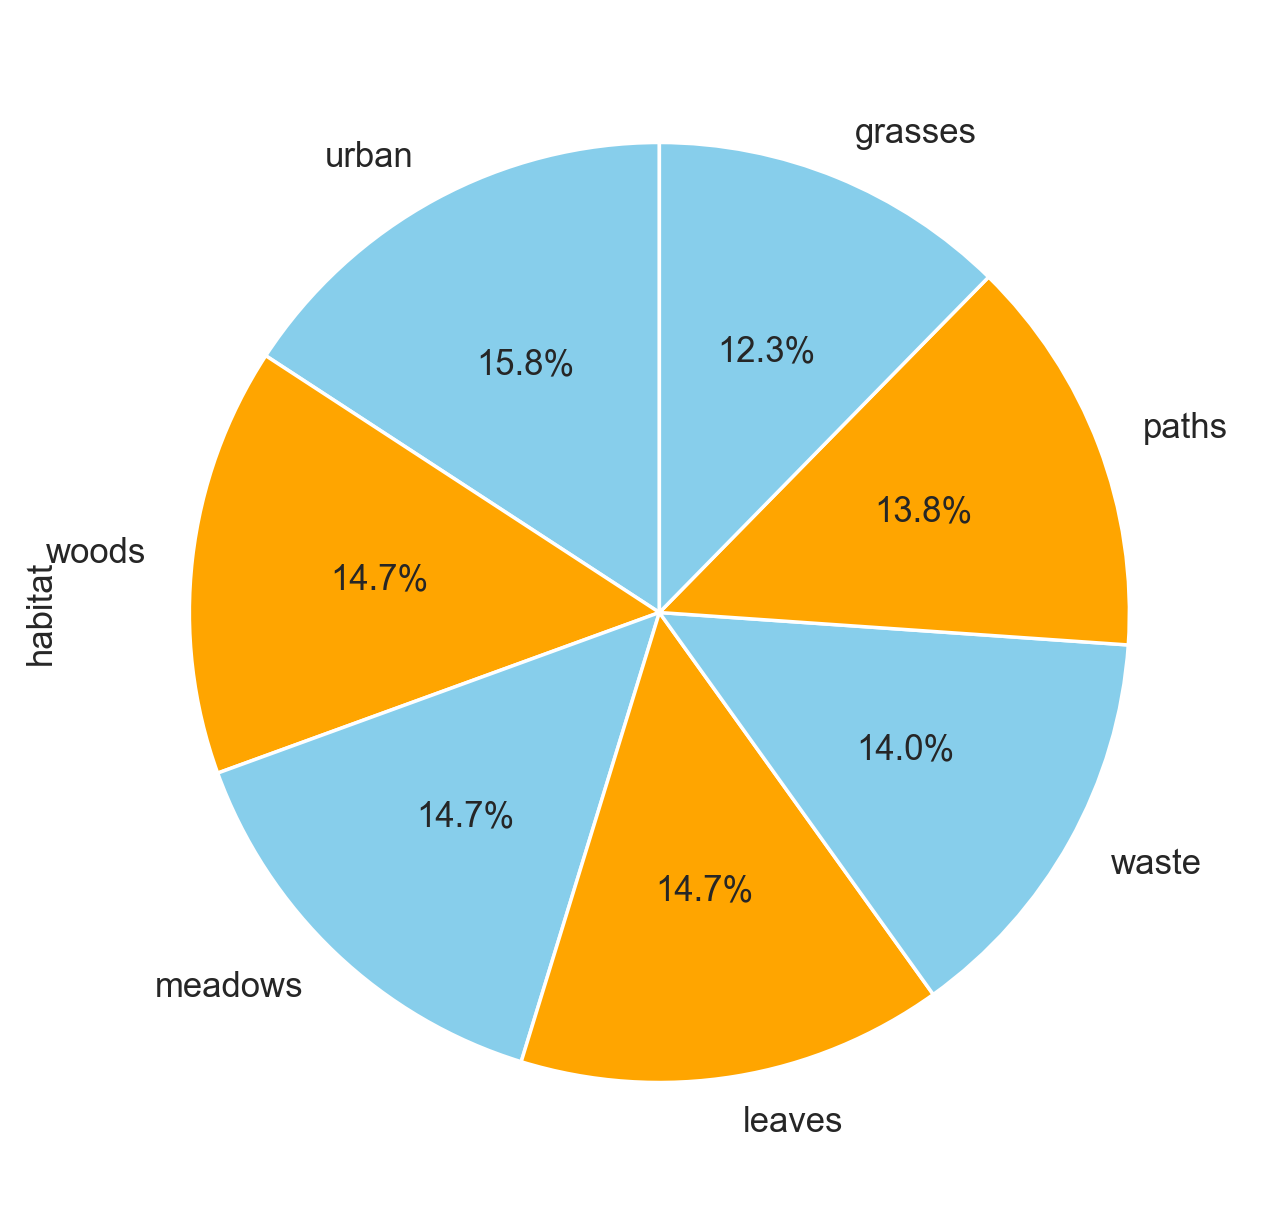

In [30]:
df['habitat'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.tight_layout()

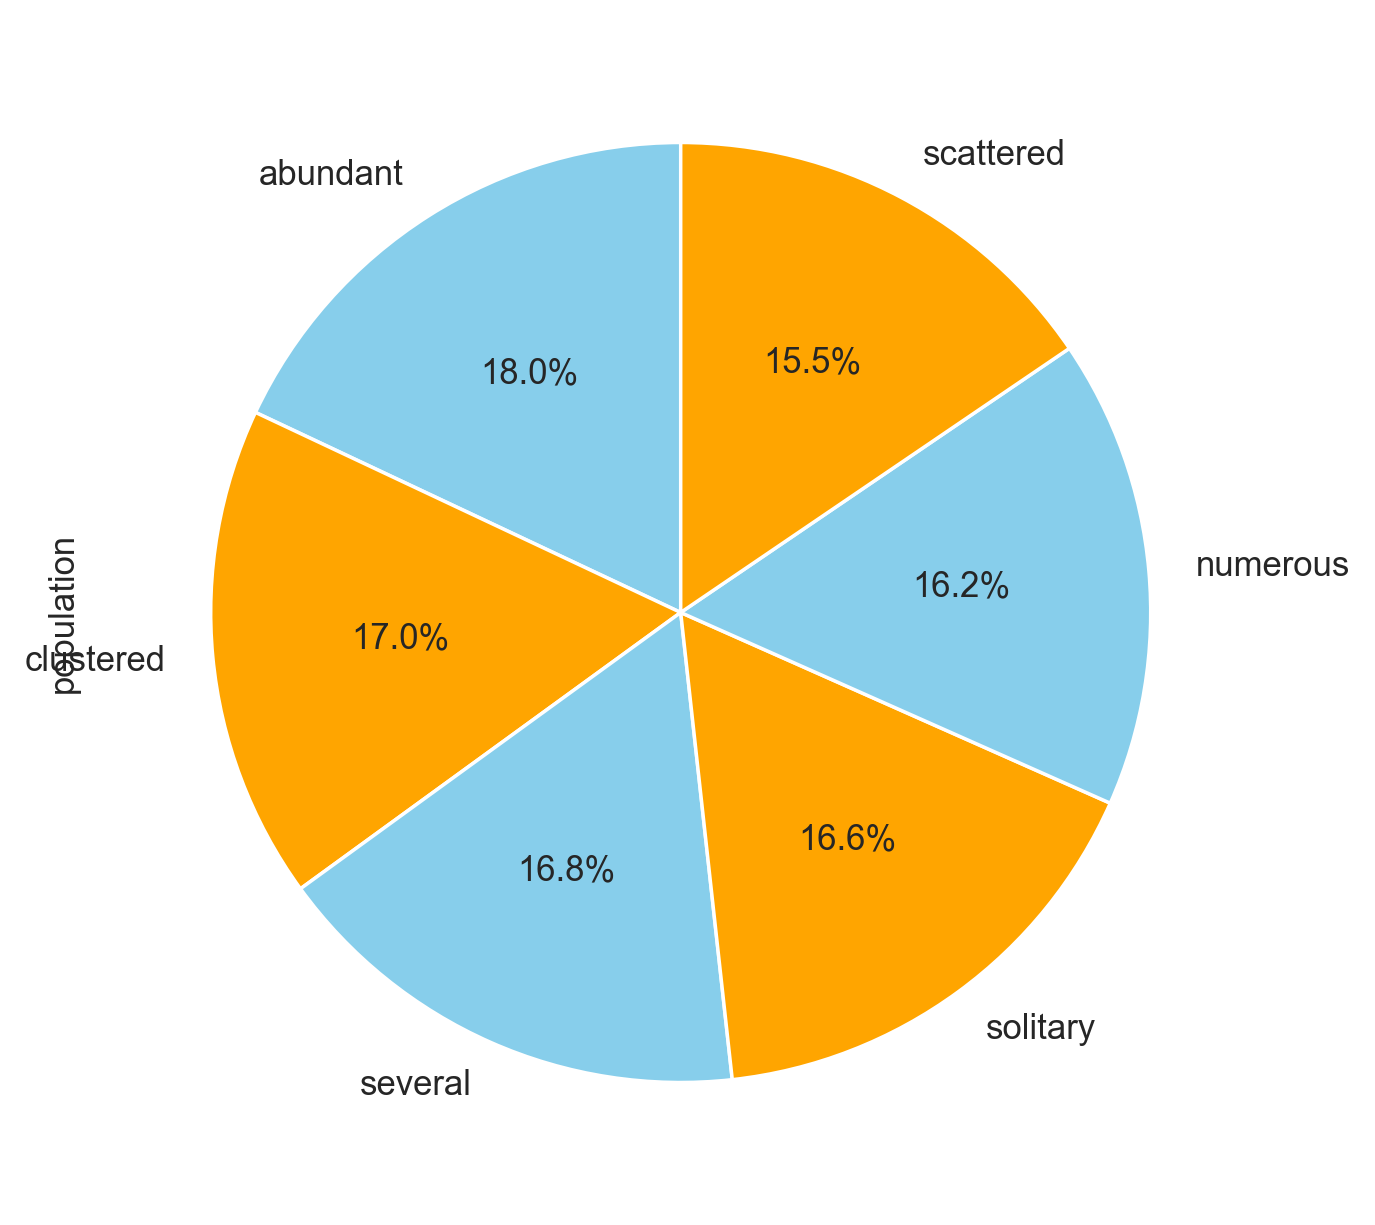

In [31]:
df['population'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.tight_layout()

### Encoding

In [32]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,one,sheathing,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,bulbous,silky,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,rhizomorphs,fibrous,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,missing,smooth,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,rooted,scaly,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [33]:
encoded_df = df.apply(LabelEncoder().fit_transform)

In [34]:
encoded_df.drop(columns='class',inplace=True)

In [35]:
encoded_df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,2,3,2,3,8,0,0,1,5,3,1,5,916,190
1,4,0,6,0,1,3,1,1,3,0,6,2,2,2,0,1,0,1,5,1,2,5,128,750
2,3,1,5,1,4,1,1,0,8,1,2,1,2,8,3,1,3,1,5,6,0,5,537,281
3,0,2,4,1,3,3,0,0,6,0,1,3,1,8,5,0,3,1,0,4,1,0,234,829
4,3,3,8,1,5,2,1,1,6,0,4,0,1,3,7,1,2,0,5,8,1,4,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,0,2,2,5,4,0,1,0,2,6,0,1,283,680
1996,4,2,5,1,5,0,2,1,9,1,5,0,0,5,4,0,2,0,6,8,2,5,335,521
1997,2,1,3,1,3,3,0,1,7,1,4,3,2,0,6,0,0,1,1,8,0,6,859,438
1998,0,3,7,0,6,2,0,1,6,0,6,1,0,3,5,1,3,0,0,1,5,6,679,320


### Standardization

In [36]:
sc = StandardScaler()
dfs = sc.fit_transform(encoded_df)

In [37]:
x = pd.DataFrame(dfs,columns=encoded_df.columns)
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1.356643,0.398424,1.194966,-1.023271,-1.206018,-0.498601,1.213339,-1.007025,0.487617,1.040833,-0.409440,1.380941,0.457901,-0.363507,1.503079,-1.010051,-1.302350,1.447748,0.863803,-0.345783,-0.841884,0.979166,1.553848,-1.006676
1,1.356643,-1.396280,0.814161,-1.023271,-1.206018,1.277359,-0.007938,0.993024,-0.693054,-0.960769,1.564953,0.492876,0.457901,-0.748985,-1.572275,0.990050,-1.302350,1.447748,0.863803,-1.109522,-0.264460,0.979166,-1.246736,0.963401
2,0.660035,-0.498928,0.433356,0.977259,0.190644,-0.498601,-0.007938,-1.007025,0.782785,1.040833,-0.409440,-0.395189,0.457901,1.563888,-0.419017,0.990050,1.381985,1.447748,0.863803,0.799826,-1.419308,0.979166,0.206866,-0.686539
3,-1.429786,0.398424,0.052551,0.977259,-0.274910,1.277359,-1.229216,-1.007025,0.192449,-0.960769,-0.903038,1.380941,-0.445257,1.563888,0.349822,-1.010051,1.381985,1.447748,-1.666375,0.036087,-0.841884,-1.557533,-0.870008,1.241323
4,0.660035,1.295777,1.575772,0.977259,0.656199,0.389379,-0.007938,0.993024,0.192449,-0.960769,0.577757,-1.283254,-0.445257,-0.363507,1.118660,0.990050,0.487207,-0.690728,0.863803,1.563564,-0.841884,0.471826,1.479213,0.027615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.356643,0.398424,-1.470669,0.977259,0.190644,-1.386580,-0.007938,0.993024,-0.693054,1.040833,-1.396636,0.492876,0.457901,0.407451,-0.034598,-1.010051,-0.407571,-0.690728,-0.654304,0.799826,-1.419308,-1.050193,-0.695860,0.717142
1996,1.356643,0.398424,0.433356,0.977259,0.656199,-1.386580,1.213339,0.993024,1.077953,1.040833,1.071355,-1.283254,-1.348414,0.407451,-0.034598,-1.010051,0.487207,-0.690728,1.369838,1.563564,-0.264460,0.979166,-0.511050,0.157780
1997,-0.036572,-0.498928,-0.328254,0.977259,-0.274910,1.277359,-1.229216,0.993024,0.487617,1.040833,0.577757,1.380941,0.457901,-1.519943,0.734241,-1.010051,-1.302350,1.447748,-1.160340,1.563564,-1.419308,1.486505,1.351268,-0.134213
1998,-1.429786,1.295777,1.194966,-1.023271,1.121753,0.389379,-1.229216,0.993024,0.192449,-0.960769,1.564953,-0.395189,-1.348414,-0.363507,0.349822,0.990050,1.381985,-0.690728,-1.666375,-1.109522,1.467811,1.486505,0.711540,-0.549337


In [38]:
df['class'].replace(['poisonous', 'edible'],[0,1],inplace=True)

### Defining x,y

In [39]:
y = df['class']
y

0       0
1       1
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: class, Length: 2000, dtype: int64

In [40]:
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1.356643,0.398424,1.194966,-1.023271,-1.206018,-0.498601,1.213339,-1.007025,0.487617,1.040833,-0.409440,1.380941,0.457901,-0.363507,1.503079,-1.010051,-1.302350,1.447748,0.863803,-0.345783,-0.841884,0.979166,1.553848,-1.006676
1,1.356643,-1.396280,0.814161,-1.023271,-1.206018,1.277359,-0.007938,0.993024,-0.693054,-0.960769,1.564953,0.492876,0.457901,-0.748985,-1.572275,0.990050,-1.302350,1.447748,0.863803,-1.109522,-0.264460,0.979166,-1.246736,0.963401
2,0.660035,-0.498928,0.433356,0.977259,0.190644,-0.498601,-0.007938,-1.007025,0.782785,1.040833,-0.409440,-0.395189,0.457901,1.563888,-0.419017,0.990050,1.381985,1.447748,0.863803,0.799826,-1.419308,0.979166,0.206866,-0.686539
3,-1.429786,0.398424,0.052551,0.977259,-0.274910,1.277359,-1.229216,-1.007025,0.192449,-0.960769,-0.903038,1.380941,-0.445257,1.563888,0.349822,-1.010051,1.381985,1.447748,-1.666375,0.036087,-0.841884,-1.557533,-0.870008,1.241323
4,0.660035,1.295777,1.575772,0.977259,0.656199,0.389379,-0.007938,0.993024,0.192449,-0.960769,0.577757,-1.283254,-0.445257,-0.363507,1.118660,0.990050,0.487207,-0.690728,0.863803,1.563564,-0.841884,0.471826,1.479213,0.027615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.356643,0.398424,-1.470669,0.977259,0.190644,-1.386580,-0.007938,0.993024,-0.693054,1.040833,-1.396636,0.492876,0.457901,0.407451,-0.034598,-1.010051,-0.407571,-0.690728,-0.654304,0.799826,-1.419308,-1.050193,-0.695860,0.717142
1996,1.356643,0.398424,0.433356,0.977259,0.656199,-1.386580,1.213339,0.993024,1.077953,1.040833,1.071355,-1.283254,-1.348414,0.407451,-0.034598,-1.010051,0.487207,-0.690728,1.369838,1.563564,-0.264460,0.979166,-0.511050,0.157780
1997,-0.036572,-0.498928,-0.328254,0.977259,-0.274910,1.277359,-1.229216,0.993024,0.487617,1.040833,0.577757,1.380941,0.457901,-1.519943,0.734241,-1.010051,-1.302350,1.447748,-1.160340,1.563564,-1.419308,1.486505,1.351268,-0.134213
1998,-1.429786,1.295777,1.194966,-1.023271,1.121753,0.389379,-1.229216,0.993024,0.192449,-0.960769,1.564953,-0.395189,-1.348414,-0.363507,0.349822,0.990050,1.381985,-0.690728,-1.666375,-1.109522,1.467811,1.486505,0.711540,-0.549337


<Axes: >

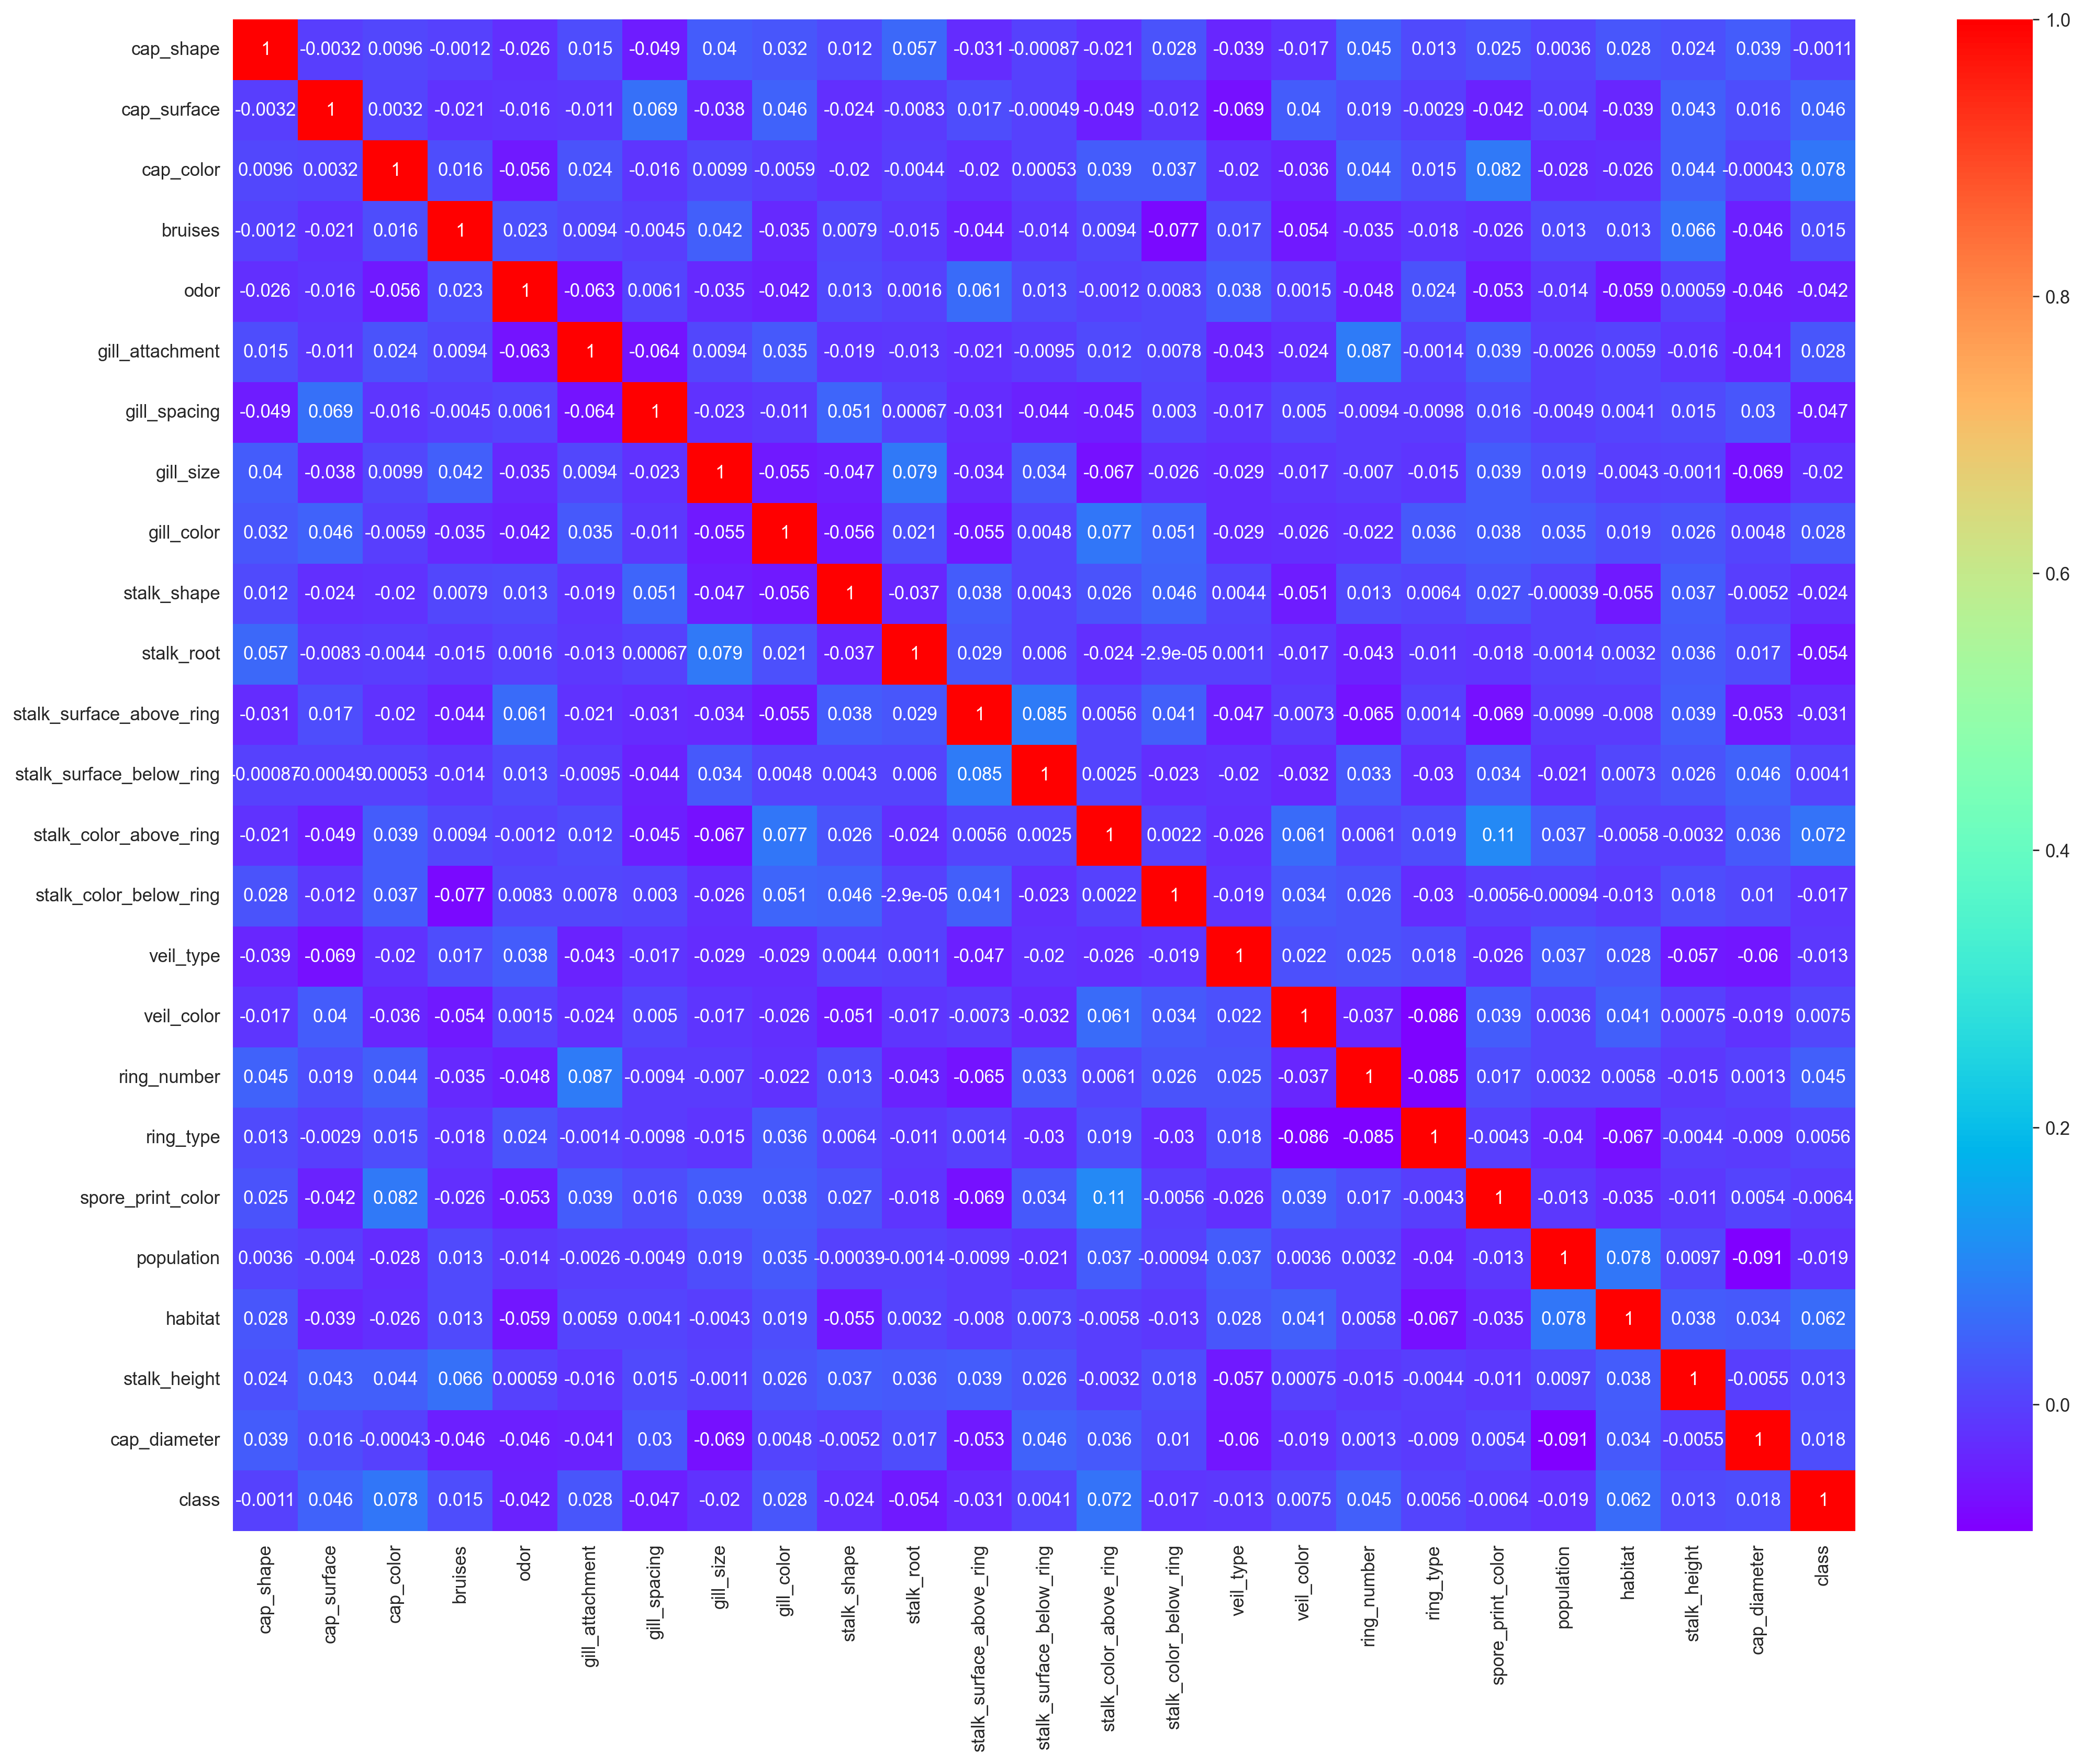

In [41]:
plt.rcParams['figure.figsize'] = (20,15)
z = pd.concat([x,y],axis=1)
sns.heatmap(z.corr(),annot=True,cmap='rainbow')

### Model Building

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
svc = SVC(random_state=1)

In [44]:
model = svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [45]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.88
0.7775


### Hyper-Parameter Tuning

In [46]:
param= {'kernel' : ['linear','rbf','poly','sigmoid'],
       'gamma': ['scale', 'auto'],
    'degree': [1,2,4],
       'C': [2,4,6]}

In [47]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [48]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [2, 4, 6], 'degree': [1, 2, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [49]:
grid.best_params_

{'C': 2, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [50]:
svc = SVC(kernel='poly',gamma='scale',degree=4,C=2)

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.99125
0.8925


In [51]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8925
Precision: 0.901780427631579
Recall: 0.8925
F1 Score: 0.8872984268769263


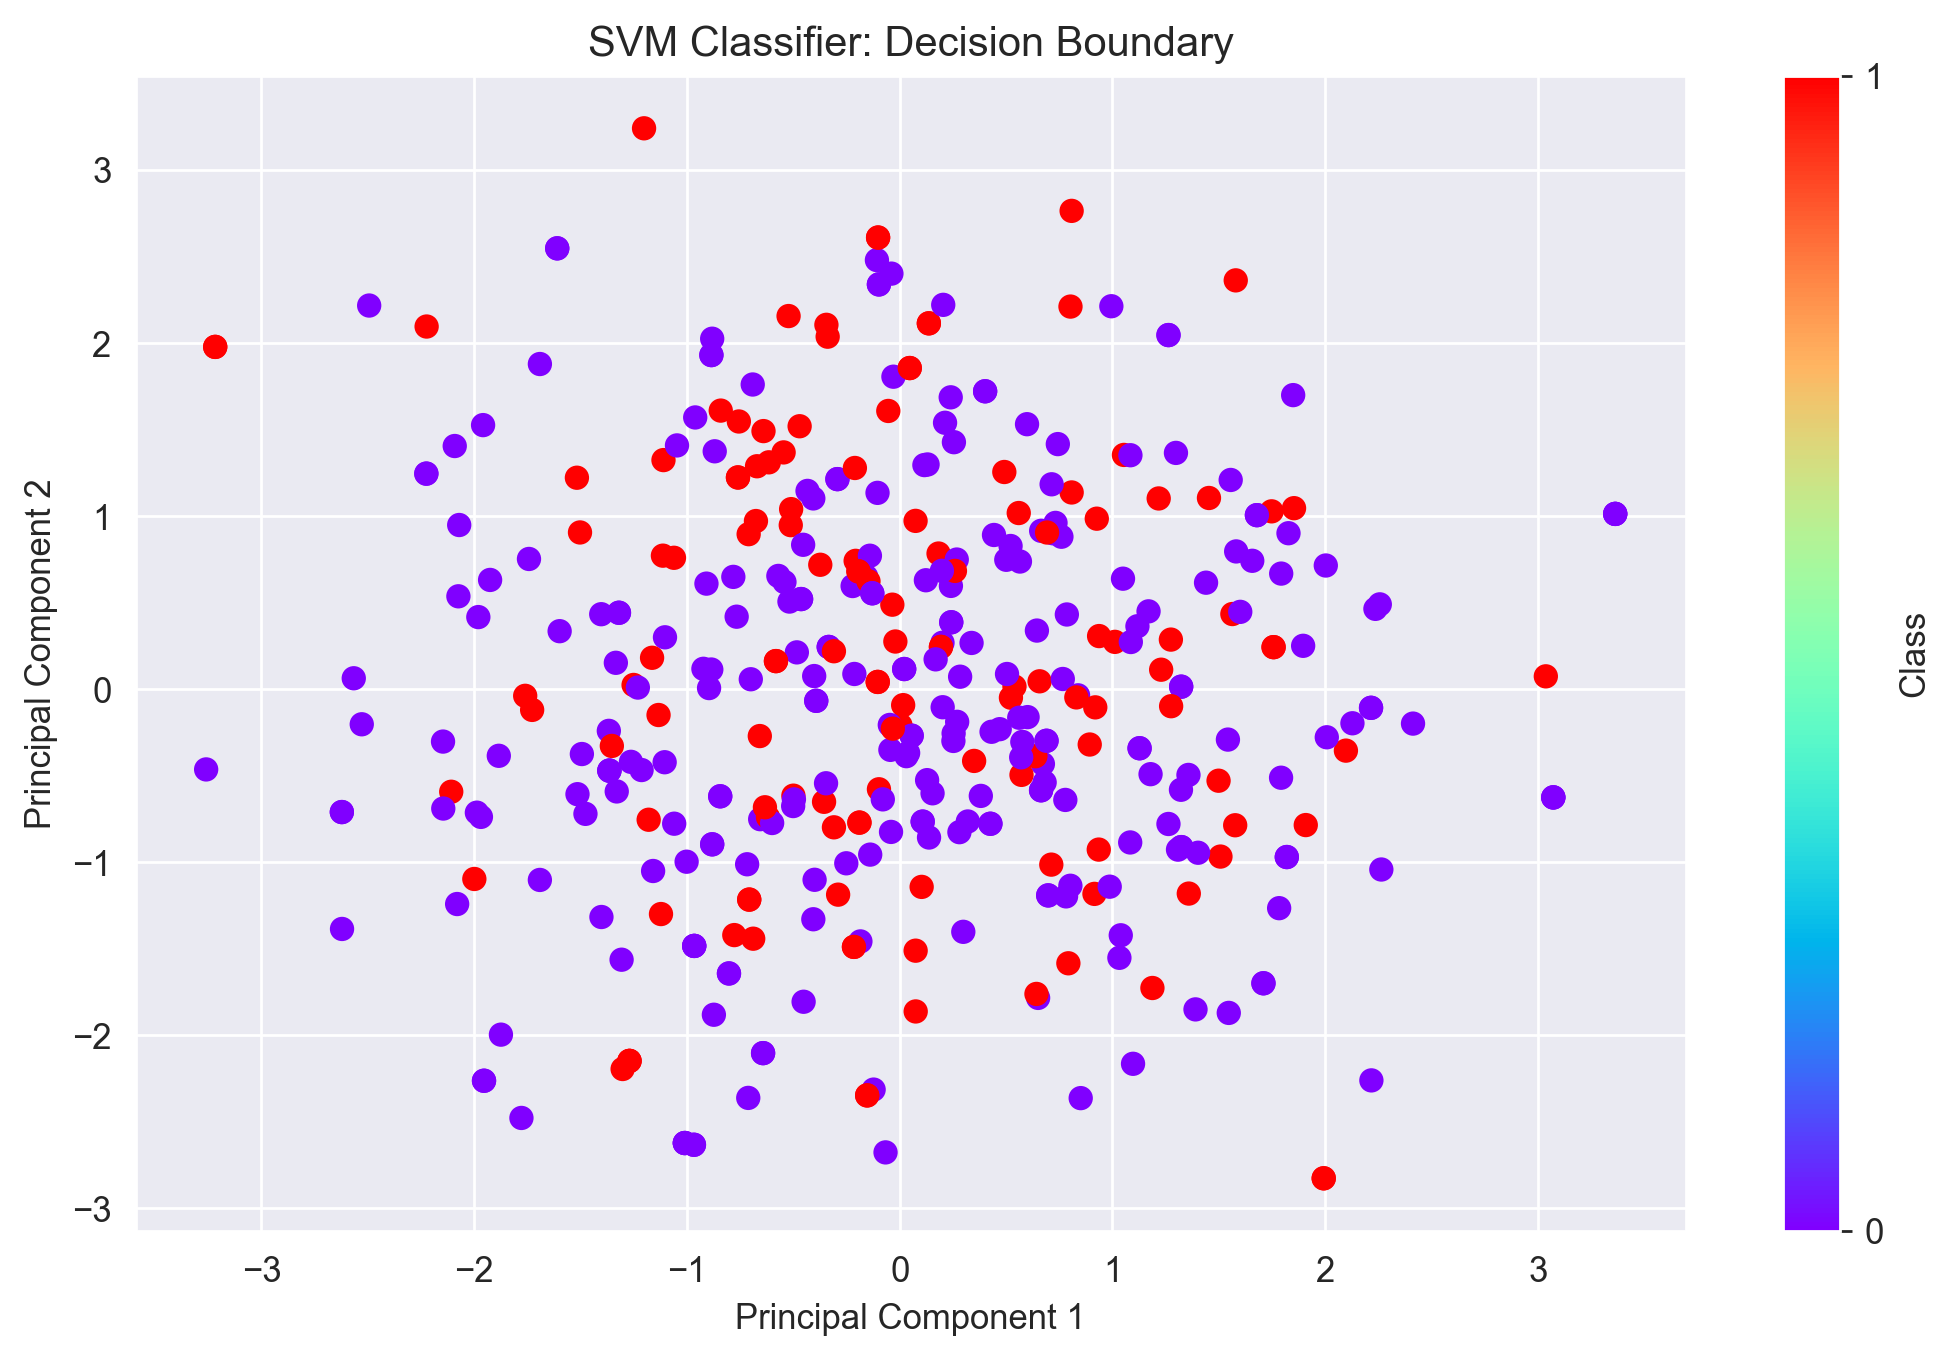

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (example using PCA)
pca = PCA(n_components=2)
X_vis = pca.fit_transform(xtest)

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=ytest, cmap='rainbow')
plt.title('SVM Classifier: Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class', ticks=range(2))
plt.show()


### Using Ensemble techniques

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(random_state=1)

In [55]:
model = rfc.fit(xtrain,ytrain)

In [56]:
ypred3 = rfc.predict(xtest)

In [57]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       267
           1       1.00      0.67      0.80       133

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.91      0.89      0.88       400



In [58]:
print(rfc.score(xtrain,ytrain))
print(rfc.score(xtest,ytest))

1.0
0.89


### Comparison with different kernels

In [73]:
def kernel_accuracy(k):
    svc = SVC(kernel=k,gamma='scale',degree=4,C=2)

    svc.fit(xtrain,ytrain)
    ypred = svc.predict(xtest)
    Training_Accuracy = svc.score(xtrain,ytrain)
    Testing_Accuracy = svc.score(xtest,ytest)
    return Training_Accuracy*100,Testing_Accuracy*100

In [74]:
k_linear = kernel_accuracy('linear')

In [75]:
k_rbf = kernel_accuracy('rbf')

In [76]:
k_sig = kernel_accuracy('sigmoid')

In [77]:
k_poly = kernel_accuracy('poly')

In [80]:
comparison = pd.DataFrame({
    'kernel': ['Linear', 'rbf', 'Sigmoid', 'Poly'],
    'training_accuracy': [k_linear[0], k_rbf[0], k_sig[0], k_poly[0]],
    'testing_accuracy': [k_linear[1], k_rbf[1], k_sig[1], k_poly[1]]
})

In [81]:
comparison

,kernel,training_accuracy,testing_accuracy
0,Linear,70.8125,66.75
1,rbf,95.5000,82.75
2,Sigmoid,52.3750,56.25
3,Poly,99.1250,89.25


### Analysis